In [17]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("dataset/numerical_dataset.csv")
# 刪掉第一列
data = data.drop(data.columns[0], axis=1)
data


,SCHOLARSHIP,SALARY,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND,NOTES,LISTENS,LIKES_DISCUSS,CUML_GPA,EXP_GPA,GRADE
0,3,1,1,2,3,3,2,2,1,3,2,1,1,1,1
1,3,1,2,3,2,2,2,2,1,3,2,3,2,3,1
2,3,2,2,2,2,2,1,2,1,2,2,1,2,2,1
3,3,2,1,2,5,3,1,2,1,3,2,2,3,2,1
4,3,3,3,3,2,2,1,1,1,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,3,1,1,2,2,3,3,2,1,2,1,2,3,3,5
141,4,1,1,1,5,3,2,2,2,3,2,2,5,3,5
142,4,1,3,4,4,2,2,2,1,3,3,2,4,3,1
143,4,5,4,4,1,2,2,1,1,2,1,2,5,3,4


In [18]:
from sklearn.preprocessing import LabelEncoder


# 創建 LabelEncoder 實例
label_encoder = LabelEncoder()

# 使用 LabelEncoder 將類別型資料轉換為數值
encoded_data = data.apply(label_encoder.fit_transform)

encoded_data

,SCHOLARSHIP,SALARY,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND,NOTES,LISTENS,LIKES_DISCUSS,CUML_GPA,EXP_GPA,GRADE
0,2,0,0,1,2,2,1,1,0,2,1,0,0,0,1
1,2,0,1,2,1,1,1,1,0,2,1,2,1,2,1
2,2,1,1,1,1,1,0,1,0,1,1,0,1,1,1
3,2,1,0,1,4,2,0,1,0,2,1,1,2,1,1
4,2,2,2,2,1,1,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,0,0,1,1,2,2,1,0,1,0,1,2,2,5
141,3,0,0,0,4,2,1,1,1,2,1,1,4,2,5
142,3,0,2,3,3,1,1,1,0,2,2,1,3,2,1
143,3,4,3,3,0,1,1,0,0,1,0,1,4,2,4


In [19]:
# normalize encoded data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(encoded_data), columns=encoded_data.columns)
normalized_data
# 把 SALARY 拿出來當目標函數
y = normalized_data['SALARY']
x = normalized_data.drop('SALARY', axis=1)
print(x)
#print(y)

     SCHOLARSHIP  MOTHER_EDU  FATHER_EDU  #_SIBLINGS  STUDY_HRS  READ_FREQ  \
0           0.50         0.0         0.2        0.50       0.50        0.5   
1           0.50         0.2         0.4        0.25       0.25        0.5   
2           0.50         0.2         0.2        0.25       0.25        0.0   
3           0.50         0.0         0.2        1.00       0.50        0.0   
4           0.50         0.4         0.4        0.25       0.25        0.0   
..           ...         ...         ...         ...        ...        ...   
140         0.50         0.0         0.2        0.25       0.50        1.0   
141         0.75         0.0         0.0        1.00       0.50        0.5   
142         0.75         0.4         0.6        0.75       0.25        0.5   
143         0.75         0.6         0.6        0.00       0.25        0.5   
144         1.00         0.4         0.0        1.00       0.50        0.0   

     READ_FREQ_SCI  ATTEND  NOTES  LISTENS  LIKES_DISCUSS  CUML

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

# 創建模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# print accuracy
print('Mean squared error: ', mse)
print('R2 score: ', r2)
coefficients = model.coef_
print(coefficients)

Mean squared error:  0.06777043437761153
R2 score:  0.03398414726150345
[-0.04167201  0.12438765  0.11377019  0.07876773 -0.037806   -0.08309264
  0.03077034  0.0099438  -0.20160954 -0.09687752  0.03333992  0.02064945
 -0.00550049 -0.07847868]


In [21]:
print(y_train)

122    0.00
82     0.25
12     0.00
21     0.00
47     0.00
       ... 
85     0.25
128    0.00
119    0.00
133    0.00
140    0.00
Name: SALARY, Length: 116, dtype: float64


In [29]:
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=10)
# 訓練模型
rf_regressor.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# print accuracy
print('Mean squared error: ', mse)
print('R2 score: ', r2)

# 計算準確度
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

Mean squared error:  0.0595293103448276
R2 score:  0.15145508474576252


MOTHER_EDU: 0.15214858095272654
SCHOLARSHIP: 0.09937794289160876
FATHER_EDU: 0.0966637127822398
GRADE: 0.08982182186518355
#_SIBLINGS: 0.08449671861859517
CUML_GPA: 0.0810392394953092
EXP_GPA: 0.06733538972566143
NOTES: 0.05888444231913279
STUDY_HRS: 0.05812420477050769
READ_FREQ: 0.05693966259260718
READ_FREQ_SCI: 0.049270104591273865
LISTENS: 0.042787777711437686
LIKES_DISCUSS: 0.038907228301485935
ATTEND: 0.02420317338223024


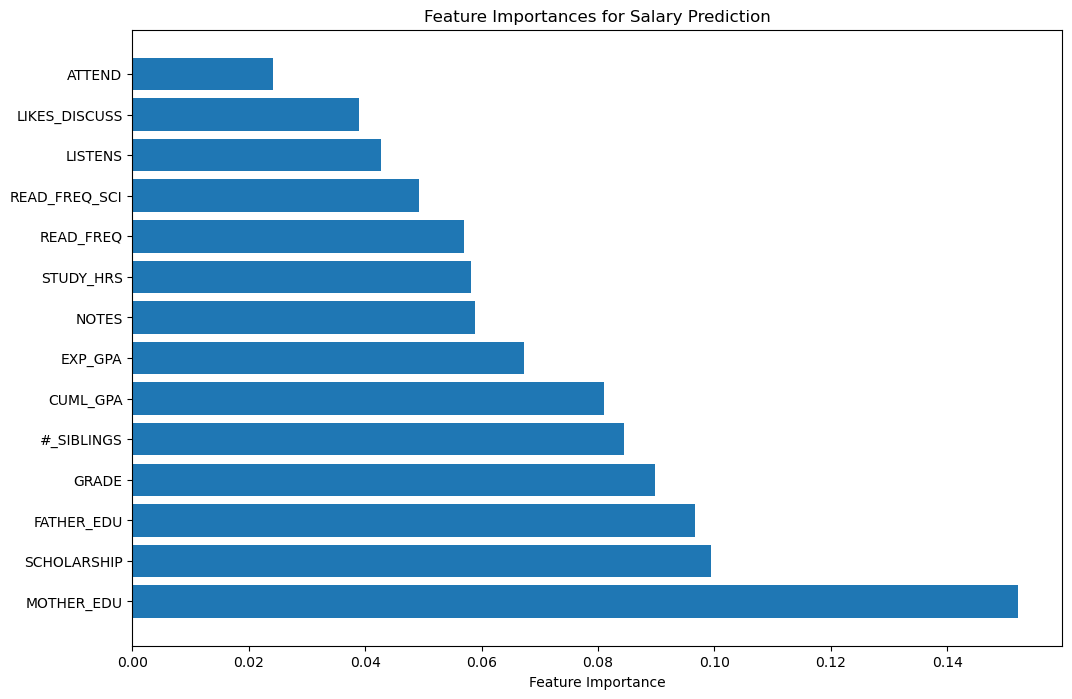

In [23]:
import matplotlib.pyplot as plt

feature_importances = rf_regressor.feature_importances_

# 將特徵重要性與特徵名稱進行配對
feature_importance_dict = dict(zip(x.columns, feature_importances))

# 將特徵重要性排序
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

# 繪製特徵重要性圖
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_feature_importance)), [val[1] for val in sorted_feature_importance], align='center')
plt.yticks(range(len(sorted_feature_importance)), [val[0] for val in sorted_feature_importance])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Salary Prediction')
plt.show()

In [24]:
!pip install shap

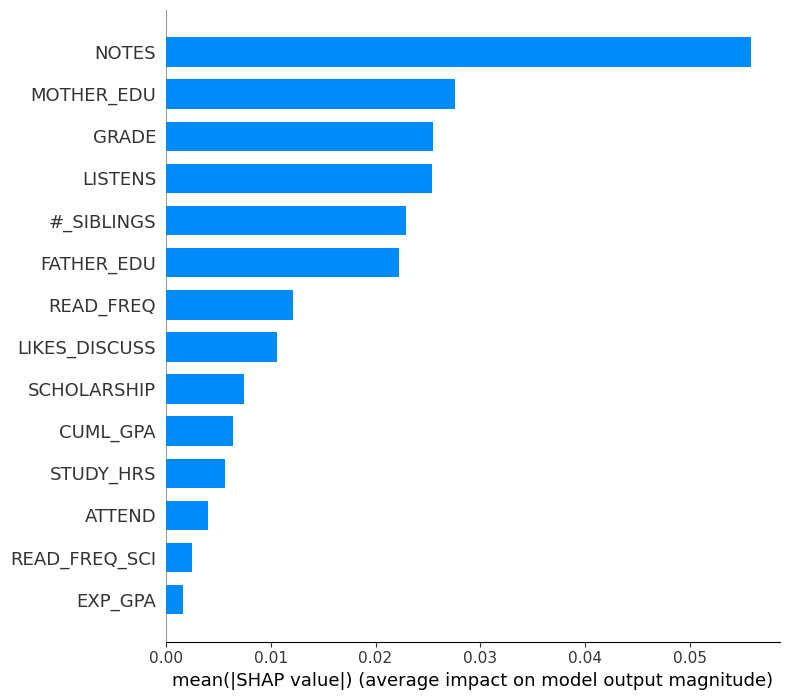

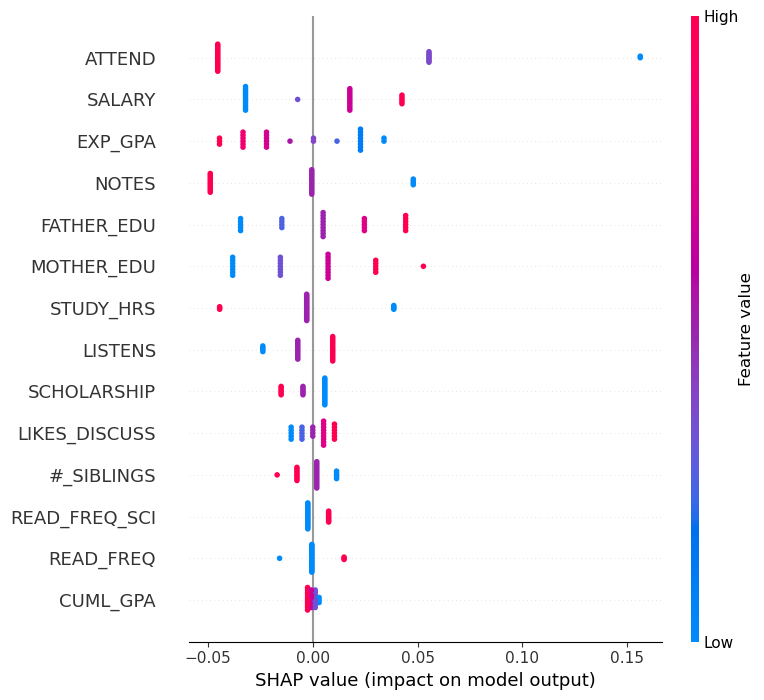

In [28]:
import shap

model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)
# 創建一個 SHAP explainer
explainer = shap.Explainer(model, X_train)

# 計算 SHAP 值
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test, feature_names=data.columns)
# 印出 SHAP 值
#shap.summary_plot(shap_values, X_test)

In [26]:
model

LinearRegression()